In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import scipy
from scipy import stats
import statistics

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
df = pd.read_csv('/Users/wenboyi/Desktop/HR/RR/mdRQA Joint Script/newtesttableB_0.41_2_5.csv')
df = df.rename(columns={'1': 'Size','2':'%REC','3':'%DET','4':'MeanL','5':'MaxL','6':'EntrL','7':'%LAM','8':'MeanV','9':'MaxV','10':'EntrV'})
df = df.drop(['Unnamed: 10'],axis=1)
label = ['Blind','Score-directed','Normal','Violin-isolated','Normal_R','Concert','Haydn_end','Quiet Baseline']
#group = ['Visual','Invalid','Normal','Visual','Normal','Normal','Invalid','Invalid']
df['Label']=label
df = df.drop(df[df['Label']=='Haydn_end'].index)
df

,Size,%REC,%DET,MeanL,MaxL,EntrL,%LAM,MeanV,MaxV,EntrV,Label
0,211,3.517441,62.196679,3.689394,49,2.049132,77.152504,4.008772,17,2.571185,Blind
1,249,6.212803,72.689512,3.365385,31,2.155918,85.052426,4.316832,20,2.858013,Score-directed
2,229,5.892336,73.203883,4.127737,33,2.548051,84.664055,4.886957,29,3.055152,Normal
3,237,5.608076,68.063492,3.238671,31,2.056596,82.285208,3.964438,14,2.636126,Violin-isolated
4,243,7.034835,82.089552,4.148418,51,2.597104,91.107573,5.369973,24,3.218672,Normal_R
5,284,6.501686,77.307399,3.658845,48,2.354651,85.890014,4.687068,23,3.027527,Concert
7,69,1.344255,43.750000,2.333333,3,0.918296,72.932331,2.425000,4,1.121906,Quiet Baseline


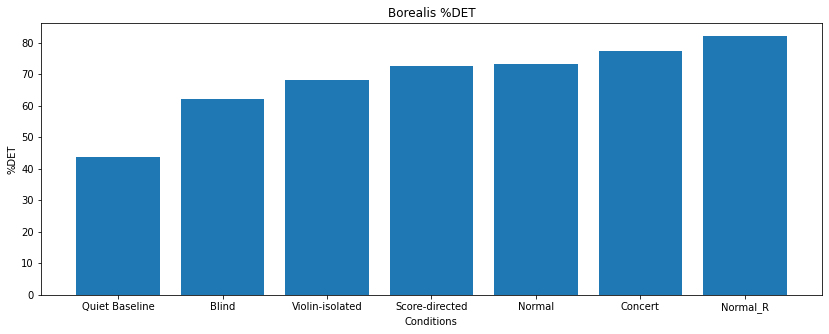

['Quiet Baseline', 'Blind', 'Violin-isolated', 'Score-directed', 'Normal', 'Concert', 'Normal_R'] [43.75, 62.1966794380588, 68.0634920634921, 72.6895119418484, 73.2038834951456, 77.3073989321129, 82.089552238806]


In [3]:
df = df.sort_values(by="%DET" , ascending=True) 
plt.figure(figsize=(14, 5))
plt.title("Borealis %DET")
plt.xlabel('Conditions')
plt.ylabel('%DET')
plt.bar(df['Label'],df['%DET'])
plt.savefig('B.png')
plt.show()
print(list(df['Label']),list(df['%DET']))


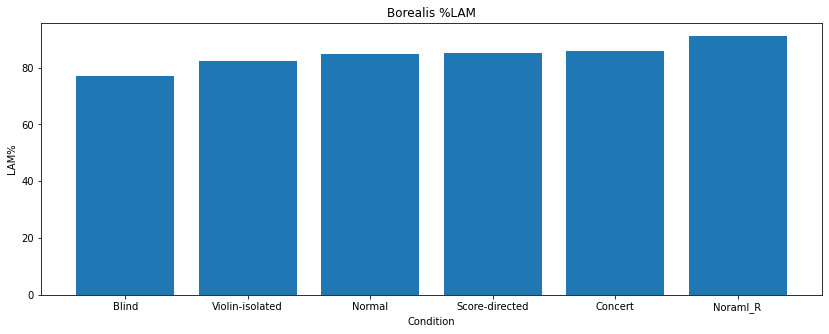

In [4]:
df = df.sort_values(by="%LAM" , ascending=True) 
plt.figure(figsize=(14, 5))
plt.title("Borealis %LAM")
plt.xlabel('Condition')
plt.ylabel('LAM%')
plt.bar(df['Label'],df['%LAM'])
plt.savefig('B LAM.png')
plt.show()


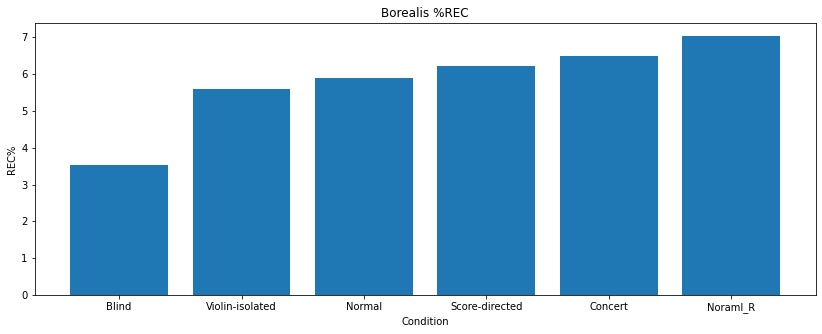

In [5]:
df = df.sort_values(by="%REC" , ascending=True) 
plt.figure(figsize=(14, 5))
plt.title("Borealis %REC")
plt.xlabel('Condition')
plt.ylabel('REC%')
plt.bar(df['Label'],df['%REC'])
plt.show()

In [6]:
a = df[df['Group']=='Visual']
a = list(a['%DET'])
b = df[df['Group']=='Normal']
print(list(b['%DET']))
b = statistics.mean(list(b['%DET']))
print(a)
print(b)
stats.ttest_1samp(a, b)

[73.2038834951456, 77.3073989321129, 82.089552238806]
[62.1966794380588, 68.0634920634921]
77.53361155535484


Ttest_1sampResult(statistic=-4.2283695070841985, pvalue=0.14784276983698075)

In [7]:
a = df[df['Group']=='Visual']
a = list(a['%DET'])
print(a)
b = df[df['Group']=='Normal']
b = list(b['%DET'])
print(b)
stats.ttest_ind(a, b)

[62.1966794380588, 68.0634920634921]
[73.2038834951456, 77.3073989321129, 82.089552238806]


Ttest_indResult(statistic=-3.1236307362370552, pvalue=0.05232367134650197)

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
